# [BAT512] Advanced Data Mining with AI <br/><br/> 9주차(7강) 실습자료

- 라이브러리 임포트

In [64]:
import torch
import numpy as np
import pandas as pd

## PyTorch 기초

### 텐서

In [2]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [4]:
print(t.dim())  # rank -> 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [5]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)
print(t.dim())  
print(t.size())

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])


### 텐서의 곱셈

행렬곱

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

element-wise 곱

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

### 텐서 형태 변형

In [38]:
ft = torch.FloatTensor([[[0, 1, 2],
                       [3, 4, 5]],
                      [[6, 7, 8],
                       [9, 10, 11]]])
print(ft.shape)

torch.Size([2, 2, 3])


3차원 텐서를 2차원으로 변경

In [10]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape) # (2, 2, 3) -> (2 × 2, 3) -> (4, 3)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


텐서 크기 변경

In [11]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


squeeze & unsqueeze: 값이 1인 차원을 제거 혹은 추가함

In [39]:
ft = ft.view([-1, 1, 3])
print(ft.shape)

torch.Size([4, 1, 3])


In [43]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [44]:
ft = ft.squeeze()
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
torch.Size([1, 4, 3])


### 텐서 연결

Concatenating

In [45]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(x.shape)
print(y.shape)

torch.Size([2, 2])
torch.Size([2, 2])


In [46]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=0).shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])


In [47]:
print(torch.cat([x, y], dim=1))
print(torch.cat([x, y], dim=1).shape)

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


Stacking

In [48]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)

In [50]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z]).shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [52]:
print(torch.stack([x, y, z], dim=1))
print(torch.stack([x, y, z], dim=1).shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


## PyTorch를 사용한 MLP 구현 - 다중 선형 회귀분석

In [53]:
import torch.nn as nn
import torch.nn.functional as F

### 데이터

In [204]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
print(X_train.shape, y_train.shape)

torch.Size([5, 3]) torch.Size([5, 1])


### 단순 구현

In [118]:
model = nn.Linear(3,1, dtype=torch.float) # Random initialization
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3641, -0.1274, -0.1885]], requires_grad=True), Parameter containing:
tensor([0.0146], requires_grad=True)]


In [119]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

모델 학습

In [133]:
n_epochs = 5000
for epoch in range(n_epochs):
    # 예측값 출력
    prediction = model(X_train)
    
    # 손실함수 계산
    loss = F.mse_loss(prediction, y_train)
    
    # Gradient 초기화
    optimizer.zero_grad()
    # 오류 역전파를 통한 Gradient 계산
    loss.backward()
    # 가중치 업데이트
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} Loss: {loss.item()}")

Epoch: 0 Loss: 0.9220083951950073
Epoch: 500 Loss: 0.8694968223571777
Epoch: 1000 Loss: 0.8263492584228516
Epoch: 1500 Loss: 0.7904011011123657
Epoch: 2000 Loss: 0.7600452303886414
Epoch: 2500 Loss: 0.7340139746665955
Epoch: 3000 Loss: 0.7113441824913025
Epoch: 3500 Loss: 0.691313624382019
Epoch: 4000 Loss: 0.6733382940292358
Epoch: 4500 Loss: 0.6570224165916443


In [126]:
new_sample = torch.FloatTensor([[66, 49, 90]])
pred_y = model(new_sample)
print(f"새로운 데이터 {new_sample}가 입력되었을 때 예측값: {pred_y.item()}")

새로운 데이터 tensor([[66., 49., 90.]])가 입력되었을 때 예측값: 141.8816375732422


학습 후 업데이트된 가중치 확인

In [127]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8112, 0.4769, 0.7215]], requires_grad=True), Parameter containing:
tensor([0.0356], requires_grad=True)]


### PyTorch Class로 구현

Class 형태로 PyTorch 모델을 쓰기 위해선 다음 두 가지 조건을 따라야 함
- PyTorch 내장 모델(nn.Linear 등) 역시 이를 만족

##### torch.nn.Module을 상속해야 함
\* interitance: 상속; 어떤 클래스를 만들 때 다른 클래스의 기능을 그대로 가지고오는 것

\* nn.Module (https://pytorch.org/docs/stable/nn.html#module)
- PyTorch의 nn 모듈은 인공신경망을 기반으로 하는 모든 것을 포괄하는 기본 클래스(Base class)임 -> 따라서 PyTorch를 사용한 모든 신경망 모델은 nn.Module의 서브 클래스(subclass)라 할 수 있음

##### \_\_init()\_\_과 forward()를 override 해야 함
- override: 재정의; torch.nn.Module(부모클래스)에서 정의한 메소드를 자식클래스에서 변경하는 것
- \_\_init()\_\_에서는 모델에서 사용될 module(nn.Linear, nn.Conv2d), activation function(nn.functional.relu, nn.functional.sigmoid)등을 정의함
- forward()에서는 모델에서 실행되어야하는 계산을 정의함. backward 계산은 backward()를 이용하면 PyTorch가 자동으로 수행하므로 forward()만 정의해주면 됨. input을 넣어서 어떤 계산을 진행하여 output이 나올지를 정의하는 부분 



In [130]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [131]:
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [132]:
n_epochs = 5000
for epoch in range(n_epochs):
    # 예측값 출력
    prediction = model(X_train) # --> model.forward(X_train)
    
    # 손실함수 계산
    loss = F.mse_loss(prediction, y_train)
    
    # Gradient 초기화
    optimizer.zero_grad()
    # 오류 역전파를 통한 Gradient 계산
    loss.backward()
    # 가중치 업데이트
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} Loss: {loss.item()}")

Epoch: 0 Loss: 15703.3232421875
Epoch: 500 Loss: 2.743265151977539
Epoch: 1000 Loss: 2.2900092601776123
Epoch: 1500 Loss: 1.940495252609253
Epoch: 2000 Loss: 1.6701768636703491
Epoch: 2500 Loss: 1.4603464603424072
Epoch: 3000 Loss: 1.2967568635940552
Epoch: 3500 Loss: 1.1684653759002686
Epoch: 4000 Loss: 1.0672235488891602
Epoch: 4500 Loss: 0.9866674542427063


### Mini-batch 학습

PyTorch는 수월한 데이터 처리를 위해 데이터셋(Dataset)과 데이터로더(DataLoader) 모듈을 제공

- 데이터셋과 데이터로더를 사용하여 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리 등 다양한 데이터 처리를 수행할 수 있음

In [136]:
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader 

데이터셋 정의

In [205]:
dataset = TensorDataset(X_train, y_train)

In [206]:
dataset.tensors

(tensor([[ 73.,  80.,  75.],
         [ 93.,  88.,  93.],
         [ 89.,  91.,  90.],
         [ 96.,  98., 100.],
         [ 73.,  66.,  70.]]),
 tensor([[152.],
         [185.],
         [180.],
         [196.],
         [142.]]))

데이터로더에 데이터셋 전달

In [207]:
dataloader = DataLoader(dataset, batch_size= 2, shuffle=True)

데이터로더로부터 미니 배치 추출

In [208]:
next(iter(dataloader))

[tensor([[93., 88., 93.],
         [73., 80., 75.]]),
 tensor([[185.],
         [152.]])]

데이터셋과 데이터로더의 크기

In [211]:
print("Dataset size:",len(dataset))
print("DataLoader size:", len(dataloader)) # 2, 2, 1

Dataset size: 5
DataLoader size: 3


미니 배치 학습 수행

In [152]:
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [153]:
n_epochs = 10
for epoch in range(n_epochs):
    for batch_idx, batch_samples in enumerate(dataloader):
        print(f"batch_idx: {batch_idx},\nbatch_samples: {batch_samples}")
        X_train, y_train = batch_samples
        
        # 예측값 출력
        prediction = model(X_train) # --> model.forward(X_train)

        # 손실함수 계산
        loss = F.mse_loss(prediction, y_train)

        # Gradient 초기화
        optimizer.zero_grad()
        # 오류 역전파를 통한 Gradient 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()

        print(f"Epoch: {epoch}/{n_epochs} Loss: {loss.item()}\n")

batch_idx: 0,
batch_samples: [tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
Epoch: 0/10 Loss: 24697.107421875

batch_idx: 1,
batch_samples: [tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]), tensor([[180.],
        [196.]])]
Epoch: 0/10 Loss: 11383.7490234375

batch_idx: 2,
batch_samples: [tensor([[73., 80., 75.]]), tensor([[152.]])]
Epoch: 0/10 Loss: 1541.340576171875

batch_idx: 0,
batch_samples: [tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Epoch: 1/10 Loss: 700.5955810546875

batch_idx: 1,
batch_samples: [tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]]), tensor([[185.],
        [196.]])]
Epoch: 1/10 Loss: 582.7447509765625

batch_idx: 2,
batch_samples: [tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch: 1/10 Loss: 72.16468048095703

batch_idx: 0,
batch_samples: [tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]]), tensor([[196.],
        [152.]])]
Epoch: 2/10 Loss: 21.074504852294

## PyTorch를 사용한 MLP 구현 - 로지스틱 회귀분석(단일 퍼셉트론)

### 데이터

In [166]:
X_train = torch.FloatTensor([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_train = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

### 모델 구축 및 학습

In [167]:
class SinglePerceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [168]:
model = SinglePerceptron()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [174]:
n_epochs = 2000
for epoch in range(n_epochs):
    for batch_idx, batch_samples in enumerate(dataloader):
        X_batch, y_batch = batch_samples
        
        # 예측값 출력
        prediction = model(X_batch) # --> model.forward(X_train)

        # 손실함수 계산
        loss = F.binary_cross_entropy(prediction, y_batch)

        # Gradient 초기화
        optimizer.zero_grad()
        # 오류 역전파를 통한 Gradient 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}/{n_epochs} Loss: {loss.item()}\n")

Epoch: 0/2000 Loss: 0.5697183609008789

Epoch: 100/2000 Loss: 0.9180656671524048

Epoch: 200/2000 Loss: 1.1139137744903564

Epoch: 300/2000 Loss: 0.9576201438903809

Epoch: 400/2000 Loss: 0.9506452679634094

Epoch: 500/2000 Loss: 0.8936256170272827

Epoch: 600/2000 Loss: 0.8665769696235657

Epoch: 700/2000 Loss: 0.882320761680603

Epoch: 800/2000 Loss: 0.7856621742248535

Epoch: 900/2000 Loss: 0.8777483701705933

Epoch: 1000/2000 Loss: 0.9648956060409546

Epoch: 1100/2000 Loss: 0.8408793210983276

Epoch: 1200/2000 Loss: 0.7546354532241821

Epoch: 1300/2000 Loss: 0.9314188957214355

Epoch: 1400/2000 Loss: 0.8471120595932007

Epoch: 1500/2000 Loss: 0.8493369817733765

Epoch: 1600/2000 Loss: 0.7105743885040283

Epoch: 1700/2000 Loss: 0.9224957823753357

Epoch: 1800/2000 Loss: 0.7612756490707397

Epoch: 1900/2000 Loss: 0.8631608486175537



In [175]:
with torch.no_grad():
    prediction = model(X_train)
    pred_y = (prediction > 0.5).float()
    accuracy = (pred_y == y_train).float().mean()
    print('모델의 출력값(Hypothesis): ', prediction.detach().cpu().numpy(), "\n")
    print('모델의 예측값(Predicted): ', pred_y.detach().cpu().numpy(), "\n")
    print('실제값(Y): ', y_train.cpu().numpy(), "\n")
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5328601 ]
 [0.4973539 ]
 [0.47820875]
 [0.43750492]
 [0.40814248]
 [0.38458192]] 

모델의 예측값(Predicted):  [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 

실제값(Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 

정확도(Accuracy):  0.3333333432674408


## PyTorch를 사용한 MLP 구현 - 다층 퍼셉트론

### 데이터

- 캘리포니아 집값 예측 데이터(Scikit-learn 제공)

In [212]:
from sklearn.datasets import fetch_california_housing
rawdata = fetch_california_housing()

In [213]:
data_target = np.concatenate([rawdata["data"], rawdata["target"].reshape(-1,1)], axis=1)

In [214]:
independent_variables = rawdata["feature_names"]
dependent_variable = ["Target"]
feature_list = independent_variables+dependent_variable

In [215]:
data = pd.DataFrame(data_target, columns=feature_list)

In [216]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [217]:
X = torch.tensor(data[independent_variables].values, dtype=torch.float)

In [218]:
X

tensor([[   8.3252,   41.0000,    6.9841,  ...,    2.5556,   37.8800,
         -122.2300],
        [   8.3014,   21.0000,    6.2381,  ...,    2.1098,   37.8600,
         -122.2200],
        [   7.2574,   52.0000,    8.2881,  ...,    2.8023,   37.8500,
         -122.2400],
        ...,
        [   1.7000,   17.0000,    5.2055,  ...,    2.3256,   39.4300,
         -121.2200],
        [   1.8672,   18.0000,    5.3295,  ...,    2.1232,   39.4300,
         -121.3200],
        [   2.3886,   16.0000,    5.2547,  ...,    2.6170,   39.3700,
         -121.2400]])

In [234]:
y = torch.tensor(data["Target"].values, dtype=torch.float)
y = y.view(-1, 1)

### 데이터셋 분할

- Training/Test 데이터셋 분할

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
print("X:",X.shape,"y:",y.shape)

X: torch.Size([20640, 8]) y: torch.Size([20640, 1])


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [240]:
print("X_train:",X_train.shape,"y_train:",y_train.shape,"\nX_test:",X_test.shape,"y_test:",y_test.shape)

X_train: torch.Size([16512, 8]) y_train: torch.Size([16512, 1]) 
X_test: torch.Size([4128, 8]) y_test: torch.Size([4128, 1])


In [241]:
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [242]:
print("Dataset size:",len(dataset))
print("DataLoader size:", len(dataloader))

Dataset size: 16512
DataLoader size: 129


### 모델 구축

In [303]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Sequential(
                        nn.Linear(8, 16),
                        nn.Sigmoid())
        self.hidden_layer1 = nn.Sequential(
                        nn.Linear(16, 32),
                        nn.Sigmoid())
        self.hidden_layer2 = nn.Sequential(
                        nn.Linear(32, 16),
                        nn.Sigmoid())
        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        h1 = self.input_layer(x)
        h2 = self.hidden_layer1(h1)
        h3 = self.hidden_layer2(h2)
        output = self.output_layer(h3)
        return output

In [304]:
model = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [305]:
n_epochs = 100
for epoch in range(1, n_epochs+1):
    for batch_idx, batch_samples in enumerate(dataloader):
        X_batch, y_batch = batch_samples
        
        # 예측값 출력
        prediction = model(X_batch) # --> model.forward(X_train)

        # 손실함수 계산
        loss = F.mse_loss(prediction, y_batch)

        # Gradient 초기화
        optimizer.zero_grad()
        # 오류 역전파를 통한 Gradient 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{n_epochs} Loss: {loss.item()}\n")

Epoch: 10/100 Loss: 7.313523769378662

Epoch: 20/100 Loss: 6.617067337036133

Epoch: 30/100 Loss: 4.615530014038086

Epoch: 40/100 Loss: 4.634069442749023

Epoch: 50/100 Loss: 3.909419059753418

Epoch: 60/100 Loss: 3.7053723335266113

Epoch: 70/100 Loss: 3.2060959339141846

Epoch: 80/100 Loss: 2.2623178958892822

Epoch: 90/100 Loss: 2.1110401153564453

Epoch: 100/100 Loss: 2.176313638687134



In [306]:
y_hat_test = model(X_test)

In [307]:
print(F.mse_loss(y_hat_test, y_test).item())

1.9357612133026123


In [308]:
X_test_visualize = pd.DataFrame(X_test.detach().numpy(), columns=independent_variables)

In [309]:
import matplotlib.pyplot as plt

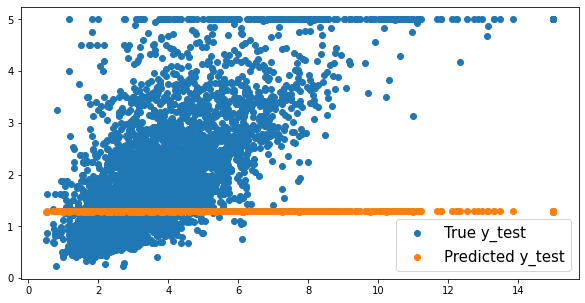

In [310]:
plt.figure(figsize=(10,5))
plt.scatter(X_test_visualize["MedInc"], y_test.detach().numpy(), label="True y_test")
plt.scatter(X_test_visualize["MedInc"], y_hat_test.detach().numpy(), label="Predicted y_test")
plt.legend(prop={"size": 15})
plt.show()